# An FEM solution to the Advection-Diffusion Equation

We would like to use FEM to solve the **galerkin** form of the AD equation. 

#### Strong form of the incompressible advection-diffusion equation:
$$\mathbf{a} \cdot \nabla \mathbf{u} - \nabla \cdot (k \nabla \mathbf{u}) - \mathbf{f} = \mathbf{0} \quad \text{s.t.} \ \ \mathbf{u} = \mathbf{g} \ \ \text{on} \ \ \Gamma_g \ \ \text{&} \ \ (k \nabla \mathbf{u}) \cdot \mathbf{n} = \mathbf{h} \ \ \text{on} \ \ \Gamma_h$$
or
$$\textbf{Res}(\mathbf{u}) = \mathcal{L}(\mathbf{u}) - \mathbf{f} = \mathbf{0} \quad \text{s.t.} \ \ \mathbf{u} = \mathbf{g} \ \ \text{on} \ \ \Gamma_g \ \ \text{&} \ \ (k \nabla \mathbf{u}) \cdot \mathbf{n} = \mathbf{h} \ \ \text{on} \ \ \Gamma_h$$

#### Weak form of the incompressible advection-diffusion equation:
$$\int_\Omega \mathbf{w} \cdot \big( \mathbf{a} \cdot \nabla \mathbf{u} - \nabla \cdot (k \nabla \mathbf{u}) - \mathbf{f} \big) \, {\rm d}\Omega = 0 \quad \text{s.t.} \ \ \mathbf{u} = \mathbf{g} \ \ \text{on} \ \ \Gamma_g \ \ \text{&} \ \ (k \nabla \mathbf{u}) \cdot \mathbf{n} = \mathbf{h} \ \ \text{on} \ \ \Gamma_h $$

Integration by parts, noting the vanishing of test function on $\Gamma_g$, and using the natural boundary condition:
$$\int_\Omega \mathbf{w} \cdot ( \mathbf{a} \cdot \nabla \mathbf{u} ) \, {\rm d}\Omega + \int_\Omega \nabla \mathbf{w} : (k \nabla \mathbf{u}) \, {\rm d}\Omega - \int_{\Gamma_h} \mathbf{w} \cdot \mathbf{h} \, {\rm d}\Gamma_h - \int_\Omega \mathbf{w} \cdot \mathbf{f} \, {\rm d}\Omega = 0 \quad \text{s.t.} \ \ \mathbf{u} = \mathbf{g} \ \ \text{on} \ \ \Gamma_g$$ 
or
$$B(\mathbf{w},\mathbf{u}) = (\mathbf{w},\mathbf{f}) + (\mathbf{w},\mathbf{h}) \quad \text{s.t.} \ \ \mathbf{u} = \mathbf{g} \ \ \text{on} \ \ \Gamma_g$$

#### SUPG stabilization:
$$B_{\rm SUPG}(\mathbf{w},\mathbf{u}) = \int_{\Omega} ( \mathbf{a} \cdot \nabla \mathbf{w} ) \cdot \tau \ \textbf{Res}(\mathbf{u}) \, {\rm d}\Omega $$
where
$$\tau = \big(\mathbf{a} \cdot \mathbf{G} \cdot \mathbf{a} + C_I^2 \ k^2 \ \mathbf{G}:\mathbf{G}\big)^{-1/2} $$

### Galerkin's method
Find $\mathbf{u}^h = \mathbf{v}^h + \mathbf{g}^h$ where $\mathbf{v}^h \in \mathcal{V}^h$ s.t. $\forall \mathbf{w}^h \in \mathcal{V}^h$: $B(\mathbf{w}^h,\mathbf{u}^h) = 0$
$$\mathbf{v}^h(\mathbf{x}) = \sum_{A=1}^N \mathbf{v}_A N_A(\mathbf{x})$$
$$\mathbf{w}^h(\mathbf{x}) = \sum_{A=1}^N \mathbf{w}_B N_B(\mathbf{x})$$
Note that $\mathbf{x}$ is a vector here and has the same dimensions as the space (2D here).

# ASSIGNMENT
Derive the 2-dimensional system for this problem in the discrete case. For your reference, the 1D case is copied here from Assignment 1. 

#### Consider the 1D case with $\Omega = [0,L]$:
$$B(w,u) = \int_0^L w \, a \dfrac{{\rm d}u}{{\rm d}x} \, {\rm d}x + \int_0^L \dfrac{{\rm d}w}{{\rm d}x} k \dfrac{{\rm d}u}{{\rm d}x} \, {\rm d}x = \int_0^L w \, f \, {\rm d}x$$

**Galerkin** - Consider a discretization with $NC$ number of control points (i.e., FE nodes)
$$\sum_{b=1}^{NC} \big(K^{\rm adv}_{ab} + K^{\rm diff}_{ab}\big) \, u_b = F_a, \qquad \forall a=1,...,NC$$
$$K^{\rm adv}_{ab} = \int_{-1}^{1} N_a \, a \, \dfrac{{\rm d}N_b}{{\rm d}\xi} \, {\rm d}\xi$$

$$K^{\rm diff}_{ab} = \int_{-1}^{1} \dfrac{{\rm d}N_a}{{\rm d}\xi} \, k \, \dfrac{{\rm d}N_b}{{\rm d}\xi} \, \dfrac{{\rm d}\xi}{{\rm d}x} \, {\rm d}\xi$$

$$F_{a} = \int_{-1}^{1} N_a \, f \, \dfrac{{\rm d}x}{{\rm d}\xi} \, {\rm d}\xi$$

Considering that for a linear FE system, $\dfrac{{\rm d}}{{\rm d}x} \Big(k \dfrac{{\rm d}u}{{\rm d}x}\Big) = 0$
$$K^{\rm SUPG}_{ab} = \int_{-1}^{1} a^2 \, \tau \, \dfrac{{\rm d}N_a}{{\rm d}\xi} \, \dfrac{{\rm d}N_b}{{\rm d}\xi} \, \dfrac{{\rm d}\xi}{{\rm d}x} \, {\rm d}\xi$$

$$F^{\rm SUPG}_{a} = \int_{-1}^{1} a \, \tau \, \dfrac{{\rm d}N_a}{{\rm d}\xi} \, f \, {\rm d}\xi$$

#### Let's start coding!

Import the required python modules for this code:

In [1]:
import numpy as np
import scipy.linalg
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt

#### Adopting the object-oriented programming, we write the following Python *class*:

In [2]:
class advectionDiffusionFEM():

    def __init__(self, Lx, Ly, Nx, Ny, a, theta, k, f, ux0, uxL, uy0, uyL, ADD_SUPG=True):
        """
            Initialize the model.
           
            input: Lx -> the size of domain in the x-direction
            input: Ly -> the size of domain in the y-direction
            input: Nx -> the number of elements in the x-direction
            input: Ny -> the number of elements in the y-direction
            input: a -> the convective velocity magnitude
            input: theta -> the convective velocity direction
            input: k -> the domain diffusivity
            input: ux0, uxL, uy0, uyL -> essential boundary conditions
            input: ADD_SUPG -> flag to indicate whether SUPG stabilization is added to the system
            output: the model problem object
        """
        
        #Discretize a 2D domain (0,L)x(0,L) into a number of elements and store the nodal positions
        #We are using linear shape functions, therefore, there are four nodes in each element (two along each axis)
        x_nodes = np.linspace(0,Lx,Nx+1)
        y_nodes = np.linspace(0,Ly,Ny+1)
        
        #Use meshgrid to create pairs of x_nodes and y_nodes to create a grid
        self.xv, self.yv = np.meshgrid(x_nodes, y_nodes)
        
        #2D case
        self.X = self.xv.ravel()
        self.Y = self.yv.ravel()
        
        #Create the connectivity matrix for bookkeeping purposes
        #Each row in connect contains the nodal numbers for each element, starting from element 1
        #Considering that there are four nodes in each element:
        self.num_elem = Nx*Ny
        self.num_nodes_in_elem = 4
        self.connect = np.zeros((self.num_elem,self.num_nodes_in_elem), dtype=np.int)
        
        #Let's populate the array by starting from the bottom left element and going to right, then top
        for j in range(Ny):
            for i in range(Nx):
                self.connect[j*Nx+i] = [j*(Nx+1)+i,j*(Nx+1)+i+1,(j+1)*(Nx+1)+i,(j+1)*(Nx+1)+i+1]
        
        #Each node has 1 degree of freedom here
        self.num_dof = self.X.size
        
        #Store the involved parameters
        self.Lx = Lx
        self.Ly = Ly
        self.ax = a * np.cos(theta*np.pi/180)
        self.ay = a * np.sin(theta*np.pi/180)
        self.a = np.array([self.ax, self.ay])
        self.k = k
        self.f = f
        self.ux0 = ux0
        self.uxL = uxL
        self.uy0 = uy0
        self.uyL = uyL
        
        self.ADD_SUPG = ADD_SUPG
        self.CI = 3 # CI constant (diffusivity part) for linear elements

            
    def N(self, xi, eta):
        """Compute linear shape functions in parametric coordinates."""
        
        return [1 / 4. * (1 - xi) * (1 - eta),
                1 / 4. * (1 + xi) * (1 - eta),
                1 / 4. * (1 - xi) * (1 + eta),
                1 / 4. * (1 + xi) * (1 + eta)]


    def dNdxi(self, xi, eta):
        """Compute shape function derivatives with respect to xi"""

        return [-1 / 4. + eta / 4., 
                 1 / 4. - eta / 4., 
                -1 / 4. - eta / 4.,
                 1 / 4. + eta / 4.] 
        
        
    def dNdeta(self, xi, eta):
        """Compute shape function derivatives with respect to eta"""
        
        return [-1 / 4. + xi / 4.,
                -1 / 4. - xi / 4.,
                 1 / 4. - xi / 4.,
                 1 / 4. + xi / 4.]

    
    def compute_jacobian_matrix_and_inverse(self, xi, eta):
        """
           Compute the Jacobian matrix and det(J) for every element
        """
        
        x = self.X
        y = self.Y
        con = self.connect
        
        #Understand we are broadcasting the dot product to every element
        J11 = np.dot(x[con], self.dNdxi(xi, eta))
        J12 = np.dot(y[con], self.dNdxi(xi, eta))
        J21 = np.dot(x[con], self.dNdeta(xi, eta))
        J22 = np.dot(y[con], self.dNdeta(xi, eta))
        
        #detJ is a vector containing the Jacobian determinant for every element
        self.detJ = J11 * J22 - J12 * J21
        
        self.Jinv11 =  J22 / self.detJ # Dxi/Dx
        self.Jinv12 = -J12 / self.detJ # Deta/Dx
        self.Jinv21 = -J21 / self.detJ # Dxi/Dy
        self.Jinv22 =  J11 / self.detJ # Deta/Dy     
        
        
    def compute_metric_tensor(self, xi, eta):
        """Computes the metric tensor for a given xi and eta"""
        
        #Returns detJ and Jinv components for this xi and eta
        self.compute_jacobian_matrix_and_inverse(xi, eta)

        Jmat = np.array([[self.Jinv11, self.Jinv12],
                         [self.Jinv21, self.Jinv22]])
 
        #Gij = Jki Jkj
        self.G = np.einsum('kim,kjm->mij', Jmat, Jmat) 
        
        
    def compute_SUPG_constant(self, xi, eta):
        """Compute the SUPG constant for a given xi and eta"""
        
        #Returns G components for this xi and eta
        self.compute_metric_tensor(xi, eta)
        
        a = self.a
        G = self.G
        k = self.k
        CI = self.CI
        
        temp = np.einsum('i,mij,j->m', a, G, a) + CI**2 * k**2 * np.einsum('mij,mij->m', G, G)
        
        self.tau = temp**(-0.5) 

        
    def compute_k_adv_integrand(self, xi, eta):
        """Computes the k_adv integrand matrix for a given xi and eta"""
            
        #Returns detJ and Jinv components for this xi and eta
        self.compute_jacobian_matrix_and_inverse(xi, eta)

        N = self.N(xi, eta)
        dNdxi = self.dNdxi(xi, eta)
        dNdeta = self.dNdeta(xi, eta)
        Jinv11 = self.Jinv11
        Jinv12 = self.Jinv12
        Jinv21 = self.Jinv21
        Jinv22 = self.Jinv22
        detJ = self.detJ
            
        #ke_adv[ab] = N[a] ( ax dN_dx[b] + ay dN_dy[b] )
        axdNdx = self.ax * ( np.einsum('m,b->mb', Jinv11, dNdxi) + np.einsum('m,b->mb', Jinv12, dNdeta) )
        aydNdy = self.ay * ( np.einsum('m,b->mb', Jinv21, dNdxi) + np.einsum('m,b->mb', Jinv22, dNdeta) )
        return np.einsum('a,mb,m->mab', N, axdNdx + aydNdy, detJ)
    
    
    def integrate_k_adv_matrix(self):
        """Integrate k_adv matrix with Gauss integration"""
            
        #Use 2 Gauss integration
        num_gauss_points = 2
        
        wts = [1., 1.]
        pts = [-np.sqrt(1 / 3.), np.sqrt(1 / 3.)]
        
        ke = np.zeros((self.num_elem, self.num_nodes_in_elem, self.num_nodes_in_elem))
            
        for i in range(num_gauss_points):
            for j in range(num_gauss_points):
                ke += wts[i] * wts[j] * self.compute_k_adv_integrand(pts[i], pts[j])
                    
        return ke  
    

    def compute_k_diff_integrand(self, xi, eta):
        """Computes the k_diff integrand matrix for a given xi and eta"""
            
        #Returns detJ and Jinv components for this xi and eta
        self.compute_jacobian_matrix_and_inverse(xi, eta)
        
        dNdxi = self.dNdxi(xi, eta)
        dNdeta = self.dNdeta(xi, eta)
        Jinv11 = self.Jinv11
        Jinv12 = self.Jinv12
        Jinv21 = self.Jinv21
        Jinv22 = self.Jinv22
        detJ = self.detJ
            
        #ke_diff[ab] = k dN_dx[a] dN_dx[b] detJ
        dNdx = np.einsum('m,b->mb', Jinv11, dNdxi) + np.einsum('m,b->mb', Jinv12, dNdeta)
        dNdy = np.einsum('m,b->mb', Jinv21, dNdxi) + np.einsum('m,b->mb', Jinv22, dNdeta)
        return self.k * (np.einsum('ma,mb,m->mab', dNdx, dNdx, detJ) + np.einsum('ma,mb,m->mab', dNdy, dNdy, detJ))
    

    def integrate_k_diff_matrix(self):
        """Integrate k_diff matrix with Gauss integration"""
            
        #Use 2 Gauss integration
        num_gauss_points = 2
        
        wts = [1., 1.]
        pts = [-np.sqrt(1 / 3.), np.sqrt(1 / 3.)]
        
        ke = np.zeros((self.num_elem, self.num_nodes_in_elem, self.num_nodes_in_elem))
            
        for i in range(num_gauss_points):
            for j in range(num_gauss_points):
                ke += wts[i] * wts[j] * self.compute_k_diff_integrand(pts[i], pts[j])
                    
        return ke
    

    def compute_k_supg_integrand(self, xi, eta):
        """Computes the k_supg integrand matrix for a given xi and eta"""
            
        #Returns the SUPG constant for this xi and eta
        #A call to Jacobian calculation is also performed within this function
        self.compute_SUPG_constant(xi, eta)
        
        tau = self.tau
        dNdxi = self.dNdxi(xi, eta)
        dNdeta = self.dNdeta(xi, eta)
        Jinv11 = self.Jinv11
        Jinv12 = self.Jinv12
        Jinv21 = self.Jinv21
        Jinv22 = self.Jinv22
        detJ = self.detJ
            
        #ke_supg[ab] = ( ax dN_dx[a] + ay dN_dy[a] ) tau ( ax dN_dx[b] + ay dN_dy[b] ) detJ
        axdNdx = self.ax * ( np.einsum('m,b->mb', Jinv11, dNdxi) + np.einsum('m,b->mb', Jinv12, dNdeta) )
        aydNdy = self.ay * ( np.einsum('m,b->mb', Jinv21, dNdxi) + np.einsum('m,b->mb', Jinv22, dNdeta) )
        return np.einsum('ma,m,mb,m->mab', axdNdx + aydNdy, self.tau, axdNdx + aydNdy, detJ)
    

    def integrate_k_supg_matrix(self):
        """Integrate k_supg matrix with Gauss integration"""
            
        #Use 2 Gauss integration
        num_gauss_points = 2
        
        wts = [1., 1.]
        pts = [-np.sqrt(1 / 3.), np.sqrt(1 / 3.)]
        
        ke = np.zeros((self.num_elem, self.num_nodes_in_elem, self.num_nodes_in_elem))
            
        for i in range(num_gauss_points):
            for j in range(num_gauss_points):
                ke += wts[i] * wts[j] * self.compute_k_supg_integrand(pts[i], pts[j])
                    
        return ke

    
    def compute_f_integrand(self, xi, eta):
        """Computes the f integrand vector for a given xi and eta"""
            
        #Returns detJ and Jinv components for this xi
        self.compute_jacobian_matrix_and_inverse(xi, eta)

        N = self.N(xi, eta)
            
        #fe[a] = N[a] f dx_dxi
        return np.einsum('a,,m->ma', N, self.f, self.detJ)
    

    def integrate_f_vector(self):
        """Integrate F vector with Gauss integration"""
            
        #Use 2 Gauss integration
        num_gauss_points = 2
        
        wts = [1., 1.]
        pts = [-np.sqrt(1 / 3.), np.sqrt(1 / 3.)]
        
        fe = np.zeros((self.num_elem, self.num_nodes_in_elem))
            
        for i in range(num_gauss_points):
            for j in range(num_gauss_points):
                fe += wts[i] * wts[j] * self.compute_f_integrand(pts[i], pts[j])
                    
        return fe
    

    def compute_f_supg_integrand(self, xi, eta):
        """Computes the f_supg integrand vector for a given xi and eta"""
            
        #Returns the SUPG constant for this xi and eta
        #A call to Jacobian calculation is also performed within this function
        self.compute_SUPG_constant(xi, eta)
        
        tau = self.tau
        dNdxi = self.dNdxi(xi, eta)
        dNdeta = self.dNdeta(xi, eta)
        Jinv11 = self.Jinv11
        Jinv12 = self.Jinv12
        Jinv21 = self.Jinv21
        Jinv22 = self.Jinv22
        detJ = self.detJ
            
        #fe[a] = ( ax dN_dx[a] + ay dN_dy[a] ) tau f detJ
        axdNdx = self.ax * ( np.einsum('m,b->mb', Jinv11, dNdxi) + np.einsum('m,b->mb', Jinv12, dNdeta) )
        aydNdy = self.ay * ( np.einsum('m,b->mb', Jinv21, dNdxi) + np.einsum('m,b->mb', Jinv22, dNdeta) )       
        return np.einsum('ma,m,,m->ma', axdNdx + aydNdy, tau, self.f, detJ)
    

    def integrate_f_supg_vector(self):
        """Integrate F_supg vector with Gauss integration"""
            
        #Use 2 Gauss integration
        num_gauss_points = 2
        
        wts = [1., 1.]
        pts = [-np.sqrt(1 / 3.), np.sqrt(1 / 3.)]
        
        fe = np.zeros((self.num_elem, self.num_nodes_in_elem))
            
        for i in range(num_gauss_points):
            for j in range(num_gauss_points):
                fe += wts[i] * wts[j] * self.compute_f_supg_integrand(pts[i], pts[j])
                    
        return fe
    

    def assemble(self):
        """Assemble element stiffness into global"""
        
        #Allocate global tangent and r.h.s vector
        self.Kmat = np.zeros((self.num_dof, self.num_dof), dtype=np.double)
        self.Fvec = np.zeros(self.num_dof, dtype=np.double)
        
        #Calculate the tangent and source terms on the local elements
        ke_adv = self.integrate_k_adv_matrix()
        ke_diff = self.integrate_k_diff_matrix()
        fe = self.integrate_f_vector()
        
        if self.ADD_SUPG:
            ke_supg = self.integrate_k_supg_matrix()
            fe_supg = self.integrate_f_supg_vector()
    
        for i in range(self.num_elem):
            idx_grid = np.ix_(self.connect[i], self.connect[i])
            self.Kmat[idx_grid] += ke_adv[i]
            self.Kmat[idx_grid] += ke_diff[i]
            if self.ADD_SUPG:
                self.Kmat[idx_grid] += ke_supg[i]
    
        for i in range(self.num_elem):
            idx_grid = self.connect[i]
            self.Fvec[idx_grid] += fe[i]
            if self.ADD_SUPG:
                self.Fvec[idx_grid] += fe_supg[i]
        

    def apply_essential_bc(self):
        """
           Modifies l.h.s. matrix and r.h.s. vector for essential b.c.s.
        """
        
        X = self.X
        Y = self.Y
        Lx = self.Lx
        Ly = self.Ly
        eps = 1e-8
        
        # Identify the boundary nodes
        bottom_nodes = np.where(Y<eps)[0]
        left_nodes = np.where(X<eps)[0]
        top_nodes = np.where(Y>Ly-eps)[0]
        right_nodes = np.where(X>Lx-eps)[0]
        
        row_replace = np.zeros(self.num_dof)
      
        #y=L (top node)
        for node in top_nodes:
            self.Kmat[node] = row_replace
            self.Kmat[node,node] = 1
            self.Fvec[node] = self.uyL(X[node])
      
        #x=L (right node)
        for node in right_nodes:
            self.Kmat[node] = row_replace
            self.Kmat[node,node] = 1
            self.Fvec[node] = self.uxL(Y[node])
        
        #y=0 (bottom nodes)
        for node in bottom_nodes:
            self.Kmat[node] = row_replace
            self.Kmat[node,node] = 1
            self.Fvec[node] = self.uy0(X[node])
      
        #x=0 (left nodes)
        for node in left_nodes:
            self.Kmat[node] = row_replace
            self.Kmat[node,node] = 1
            self.Fvec[node] = self.ux0(Y[node])
            
            
    def solve(self):
        """Solve the global system of equations"""
        
        #Convert to a sparse type matrix
        self.Kmat = scipy.sparse.csr_matrix(self.Kmat)
        
        #Solve the system
        U = scipy.sparse.linalg.spsolve(self.Kmat,self.Fvec)
        #U = np.linalg.solve(self.Kmat, self.Fvec)
        
        #We got the solution
        self.u = U 
        
            
    def plot_contour(self, levels=256, figsize=(8,8)):
        """Make the contour plots"""
        
        fig, ax = plt.subplots(figsize=figsize)
        
        cntr = ax.tricontourf(self.X, self.Y, self.u, levels=levels, cmap="jet")
        ax.set_aspect('equal', 'box');
        fig.colorbar(cntr, ax=ax)
        
        ax.tick_params(labelsize=20);
        ax.set_xlabel('x', fontsize=24);
        ax.set_ylabel('u', fontsize=24);
        
        #plt.savefig("solution.png",bbox_inches='tight') #if you would like to save it
        
  
    def plot_surf(self, elev=25, azim=75, figsize=(9, 9)):
        X = self.X
        Y = self.Y
        Z = self.u

        # Creating figyre
        fig = plt.figure(figsize=figsize)
        ax = plt.axes(projection ='3d')

        # Creating plot
        ax.plot_trisurf(X, Y, Z,
                        linewidth = 0.2,
                        antialiased = True)

        ax.view_init(elev, azim)

# Here we use the class to solve a problem.

In [5]:
# Input
Lx = 1 # length of domain in x-direction
Ly = 1 # length of domain in y-direction
Nx = 100 # number of elements in x-direction
Ny = 100 # number of elements in y-direction
a = 1 # convective velocity magnitude 
theta = 67.5 # convective velocity direction
k = 1e-6 # diffusivity
f = 0 # source term
ux0 = lambda y: 1 if y<0.25 else 0 # essential bc @ x=0
uxL = lambda y: 0  # essential bc @ x=L
uy0 = lambda x: 1  # essential bc @ y=0
uyL = lambda x: 0 # essential bc @ y=L

#### Let's assemble the problem per input and solve it.

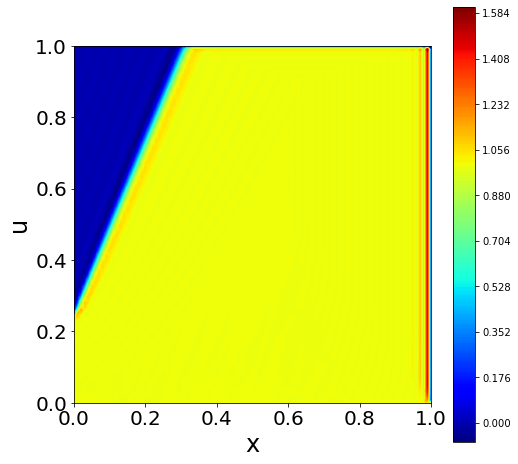

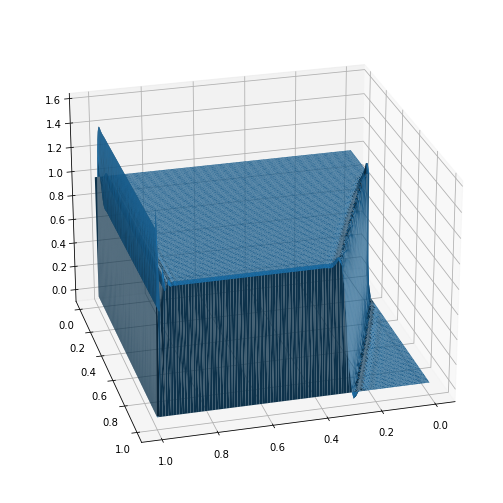

In [6]:
#Instatiate the problem
problem = advectionDiffusionFEM(Lx=Lx, 
                                Ly=Ly, 
                                Nx=Nx, 
                                Ny=Ny, 
                                a=a, 
                                theta=theta, 
                                k=k, 
                                f=f, 
                                ux0=ux0, 
                                uxL=uxL,
                                uy0=uy0, 
                                uyL=uyL,
                                ADD_SUPG=True)

#Assemble
problem.assemble()

#Apply boundary conditions
problem.apply_essential_bc()

#Solve
problem.solve()

#Evaluate the exact solution
#problem.eval_exact_sol()

#Post processing
problem.plot_contour()
problem.plot_surf()